# Insurance Claims- Fraud Detection (Evaluation Project - 10)

### Problem Statement:

#### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/df95b8b62cd132045fbc6fbfccb0d0aea820c351/Automobile_insurance_fraud.csv

In [1]:
# Let's import the necessar libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

insurance_data = pd.read_csv("Automobile_insurance_fraud.csv")
insurance_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Shape of the dataset

insurance_data.shape

(1000, 40)

Dataset has 1000 Rows and 30 columns.

In [4]:
# Let's check the null values

insurance_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

All columns looks good but 1 column has 100% null values.

In [5]:
# Quick information about dataset

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Dataset has 21 object columns in which fraud_reported is our target column. Let's check the value counts of object columns.

In [6]:
# Value counts of object columns

for col in insurance_data.columns:
    if insurance_data[col].dtype=='object':
        print(insurance_data[col].value_counts())
        print()

05-08-1992    3
28-04-1992    3
01-01-2006    3
08-11-2009    2
03-01-2004    2
             ..
27-10-2001    1
09-08-1990    1
05-08-2005    1
17-02-2009    1
17-06-2008    1
Name: policy_bind_date, Length: 951, dtype: int64

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

reading       

property_damage and police_report_available columns have some data in "?", it means maybe or not. So, we will not treat it. Otherwise all data is good. And our target column shows class imbalance issue.

In [7]:
# Let' drop the columns which is not useful

# policy_number is unique of every customer <--
# _c39 is null column <--
# policy_bind_date <--
# incident_date <--
# insured_zip almost unique for every customer <--
# incident_location column has each unique value <--

insurance_data.drop(columns = ["policy_number", "_c39", "policy_bind_date",
                               "incident_date", "incident_location"], axis=1, inplace=True)

N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

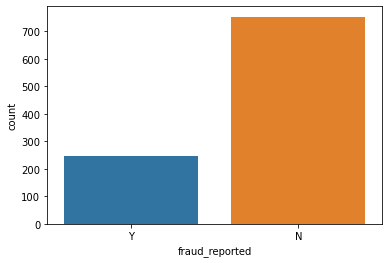

In [8]:
# Let's check the target column

print(insurance_data["fraud_reported"].value_counts())
sns.countplot(insurance_data["fraud_reported"])

Now it is clear that target column has class imbalance issue. We'll deal with it later...

In [9]:
# Let's print the all object column for analysis

for column in insurance_data:
    if insurance_data[column].dtype=='object':
        print(column)

policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
property_damage
police_report_available
auto_make
auto_model
fraud_reported


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

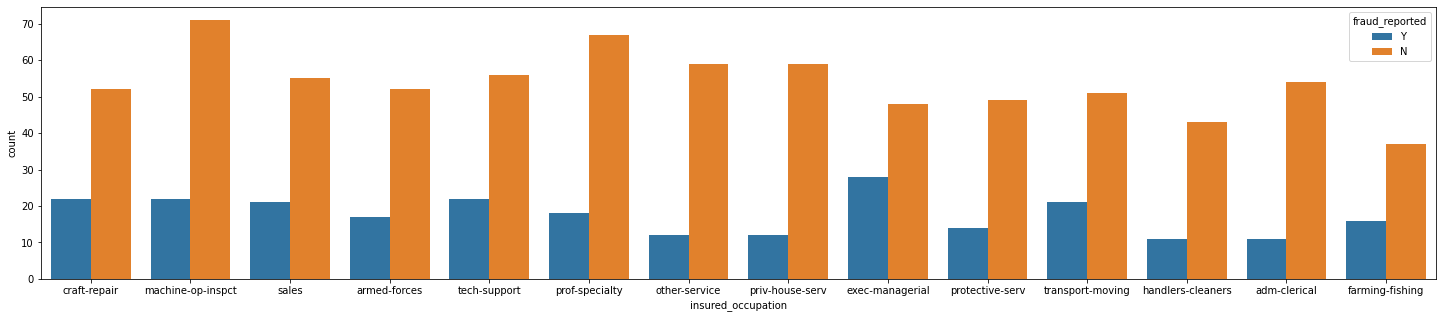

In [10]:
# Let's check the insured_occupation on fraud_report

plt.figure(figsize=(25,5))
sns.countplot(x="insured_occupation", data=insurance_data, hue="fraud_reported")

It seems that most of exec-managerials are doing fraud than others. Otherwise all are doing fraud and can't say anything.

Let's observe another things...

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

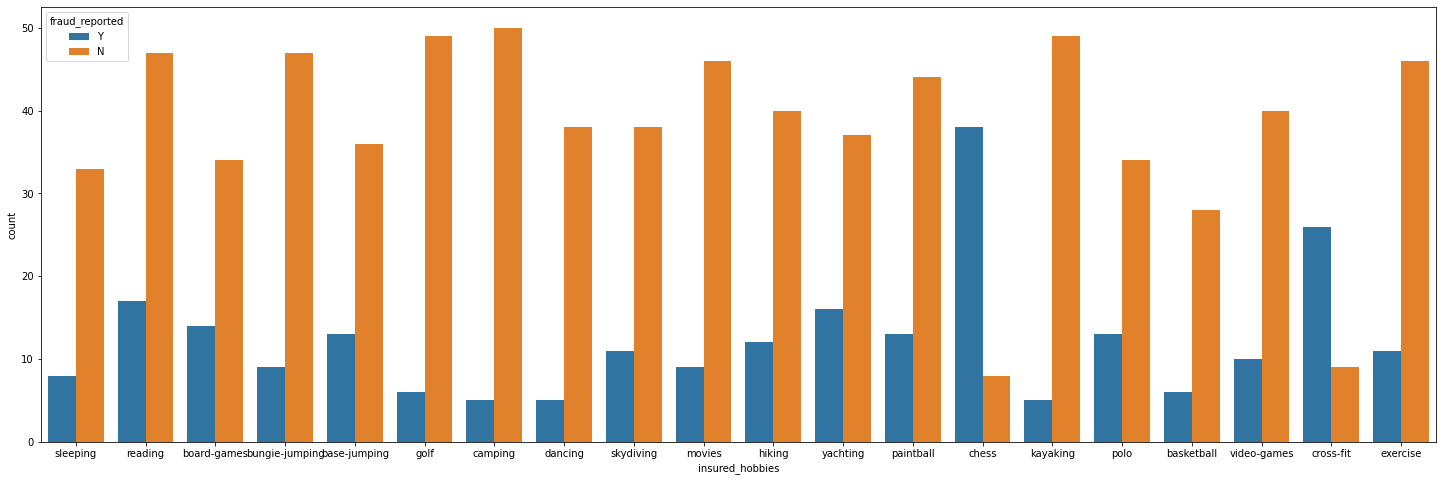

In [11]:
# Let's check the insured_hobbies on fraud_report

plt.figure(figsize=(25,8))
sns.countplot(x="insured_hobbies", data=insurance_data, hue="fraud_reported")

Most of the chess player and cross-fit are doing fraud...

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

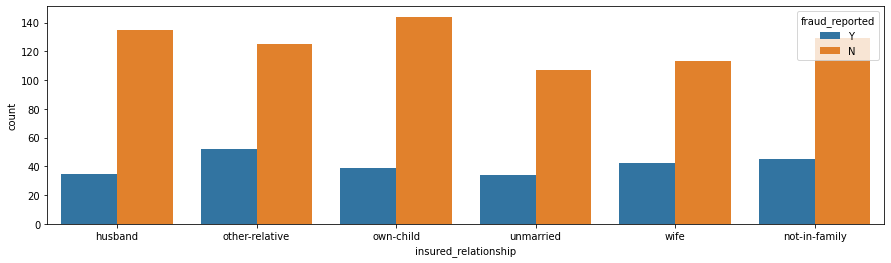

In [12]:
# Let's check the insured_relationship on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="insured_relationship", data=insurance_data, hue="fraud_reported")

In relationship all are almost equal in fraud report.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

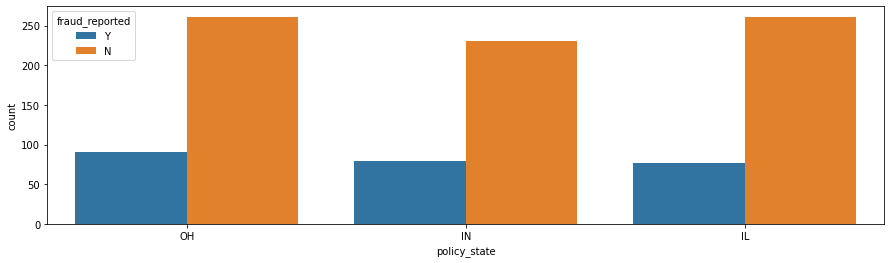

In [13]:
# Let's check the policy_state on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="policy_state", data=insurance_data, hue="fraud_reported")

All are equal in fraud report.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

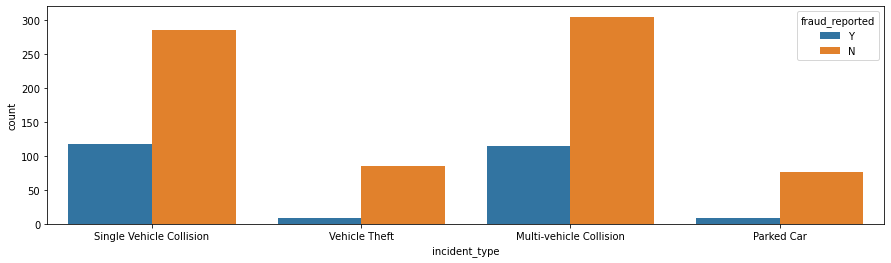

In [14]:
# Let's check the incident_type on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="incident_type", data=insurance_data, hue="fraud_reported")

Most of the Single Vehicle Collision and Multi-Vehicle Collision detect in fraud report. Now let's analyse the collision type in fraud report...

<AxesSubplot:xlabel='collision_type', ylabel='count'>

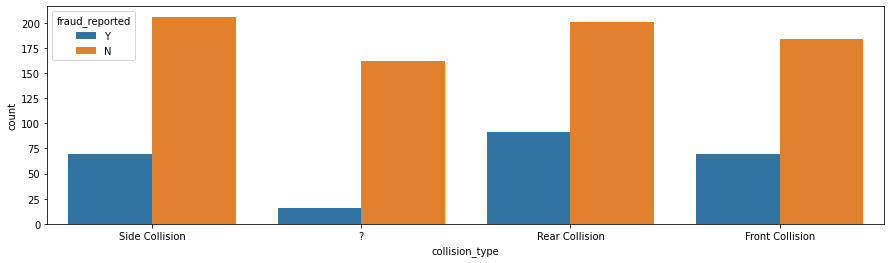

In [15]:
# Let's check the incident_type on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="collision_type", data=insurance_data, hue="fraud_reported")

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

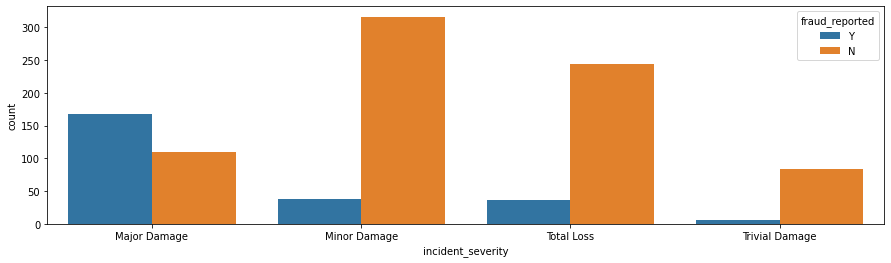

In [16]:
# Let's check the incident_severity on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="incident_severity", data=insurance_data, hue="fraud_reported")

Most of the Major Damage issues detect in fraud report..

<AxesSubplot:xlabel='incident_state', ylabel='count'>

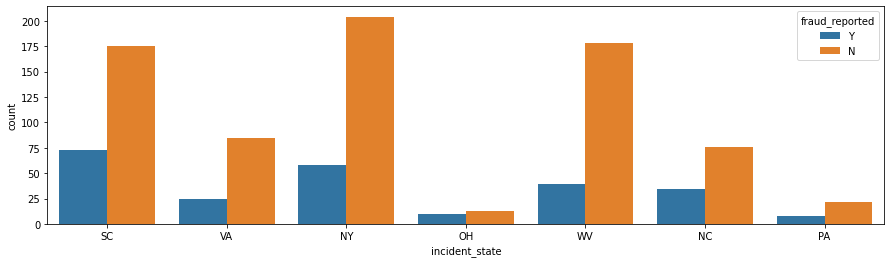

In [17]:
# Let's check the incident_state on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="incident_state", data=insurance_data, hue="fraud_reported")

Most of the fraud case are from SC & NY states.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

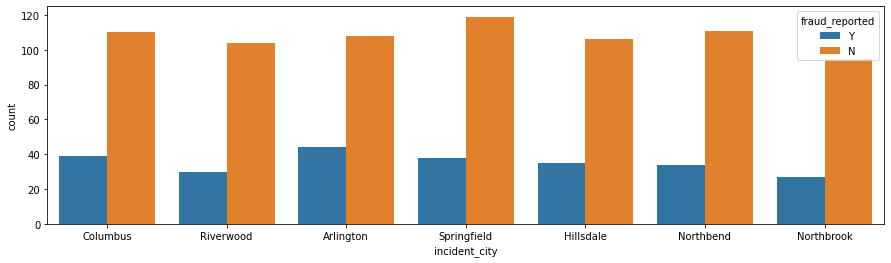

In [18]:
# Let's check the incident_city on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="incident_city", data=insurance_data, hue="fraud_reported")

All cities are equal in fraud report.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

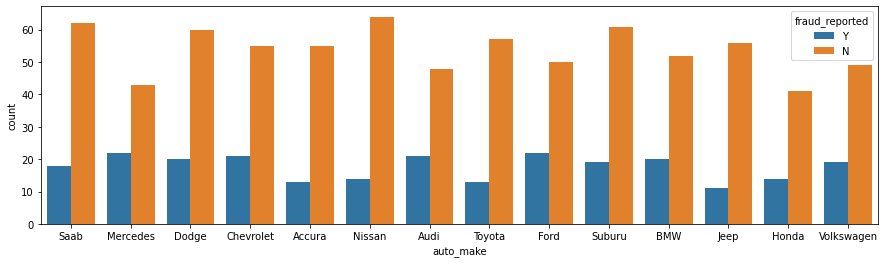

In [19]:
# Let's check the auto_make on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="auto_make", data=insurance_data, hue="fraud_reported")

Most of them are same...

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

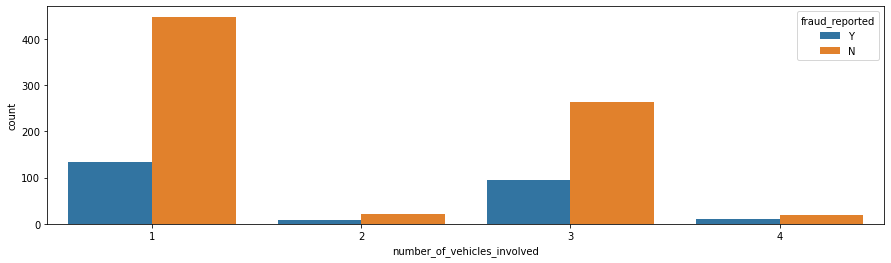

In [20]:
# Let's check the number_of_vehicle_involved on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(x="number_of_vehicles_involved", data=insurance_data, hue="fraud_reported")

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

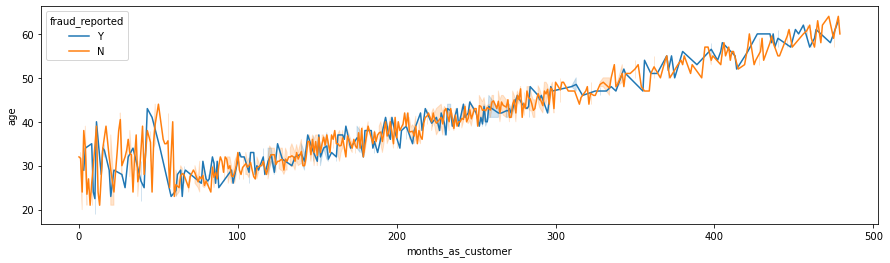

In [21]:
# Let's check the age and months_as_customer on fraud_report

plt.figure(figsize=(15,4))
sns.lineplot(y="age", data=insurance_data, x="months_as_customer", hue="fraud_reported")

Most of higher age customers and new customers are detected in fraud report.

<AxesSubplot:xlabel='total_claim_amount', ylabel='age'>

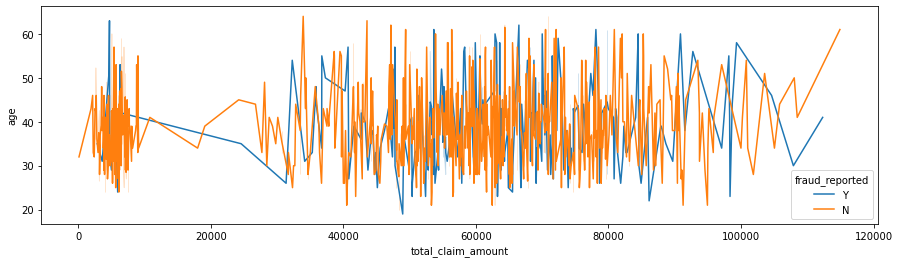

In [22]:
# Let's check the total_claim_amount on fraud_report

plt.figure(figsize=(15,4))
sns.lineplot(y="age",data=insurance_data, x="total_claim_amount", hue="fraud_reported")

Most of the customers who claimed the amount more than 40000. they generely detected in fraud report.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='age'>

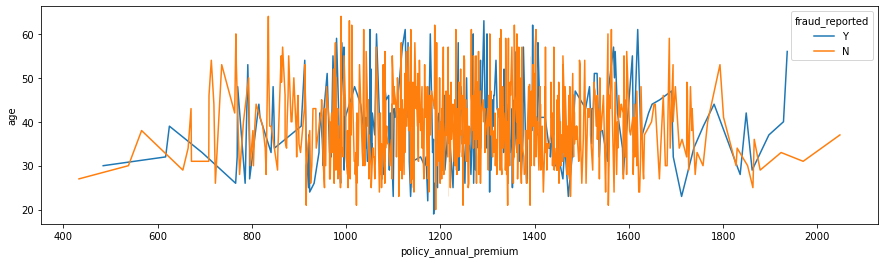

In [23]:
# Let's check the policy annual premium on fraud_report

plt.figure(figsize=(15,4))
sns.lineplot(y="age", data=insurance_data, x="policy_annual_premium", hue="fraud_reported")

The customer who has policy annual premium between 1000 to 1600 mostly detected in fraud report.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

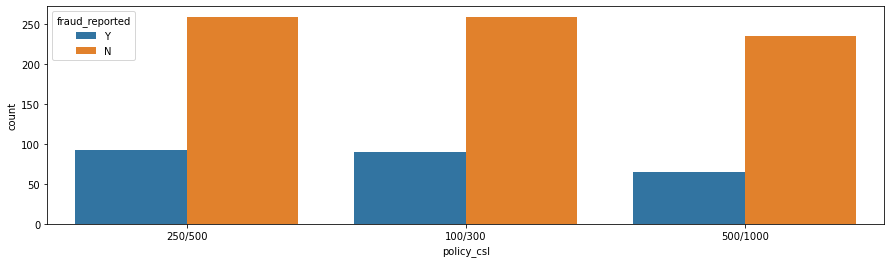

In [24]:
# Let's check the combined single limit on fraud_report

plt.figure(figsize=(15,4))
sns.countplot(data=insurance_data, x="policy_csl", hue="fraud_reported")

All are equal...

In [25]:
# Let's drop the total_claim_amount column becuase it is the some of injury_claim, property_claim & vehicle_claim

insurance_data.drop(columns = ["total_claim_amount"], axis=1, inplace=True)

<AxesSubplot:>

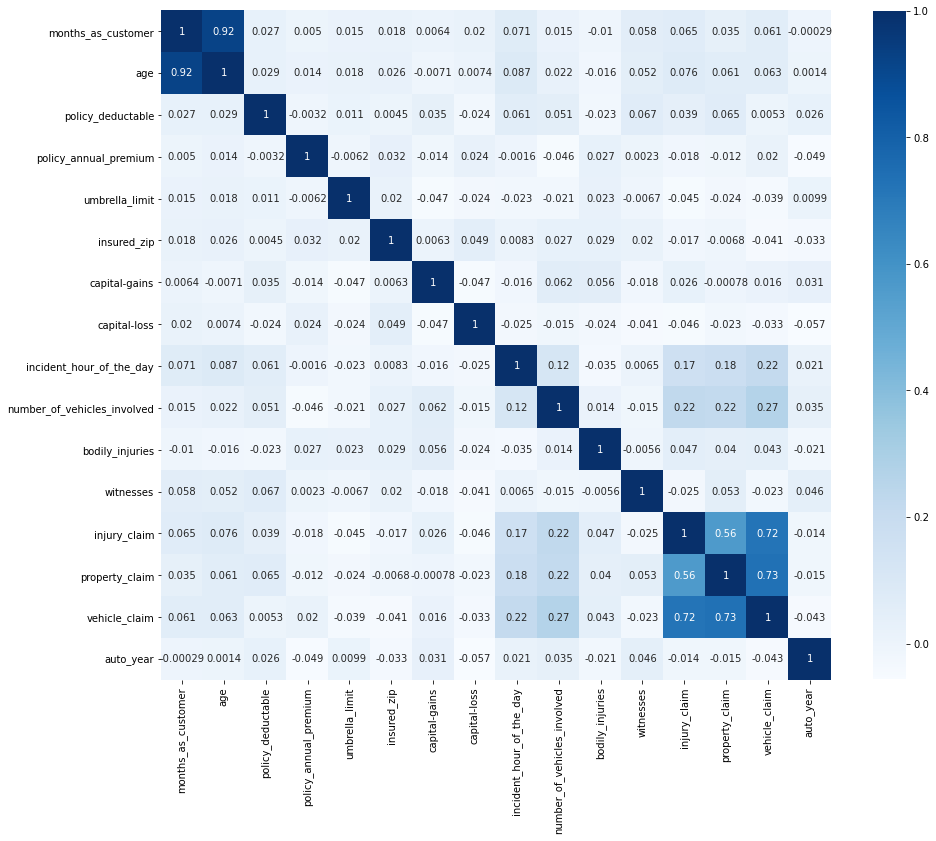

In [26]:
# Let's check the correlation Matrix

corr = insurance_data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10}, square=True,
            fmt=".2g", cmap="Blues")

Data looks good..

In [27]:
# Let's check the skewness

insurance_data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

I can see that most of the columns are in skewness range. But there are 2 or 3 columns out of range, so let's adjust it.

In [28]:
# Skewness Removing Technique

for index in insurance_data.skew().index:
    if insurance_data.skew().loc[index]>0.5:
        insurance_data[index] = np.log1p(insurance_data[index])
    if insurance_data.skew().loc[index]<-0.5:
        insurance_data[index] = np.square(insurance_data[index])

In [29]:
# Let's check the skewness again

insurance_data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.421516
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                  0.488948
auto_year                     -0.048289
dtype: float64

The skewness of all columns looks good but ther is one column named umbrella_limit has high skewness. But if I will treat it then there is 100% chance to lose the 100% data. So, Now let's drop this column for better result...

In [30]:
# Droping the umbrella_limit column

insurance_data.drop(columns = ["umbrella_limit"], axis=1, inplace=True)

In [31]:
# Let's change our targer column to classification form

insurance_data["fraud_reported"] = insurance_data["fraud_reported"].replace({"Y":1, "N":0})

In [32]:
# Now Let's use the one hot encoding technique to convert the categorical column to numerical column present in the dataset

print("Shape of dataset with categorical column  : ",insurance_data.shape)
insurance_data = pd.get_dummies(insurance_data, drop_first=True)
print("Shape of dataset after categorical column : ",insurance_data.shape)

Shape of dataset with categorical column  :  (1000, 33)
Shape of dataset after categorical column :  (1000, 144)


As we already discussed that our target column has class imbalance issue. Let's balance it...

In [33]:
# Let's first separate the input and output column

x = insurance_data.drop(columns = ["fraud_reported"], axis=1)
y = insurance_data["fraud_reported"]

Shape of the features before over_sampling :  (1000, 143)
Shape of the features after over_sampling  :  (1506, 143)

Value Counts of Target Column --


1    753
0    753
Name: fraud_reported, dtype: int64

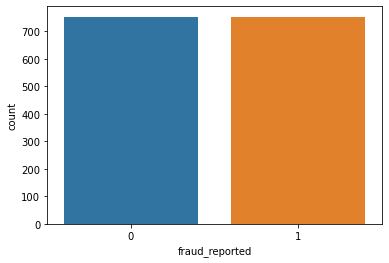

In [34]:
# Let's use the smote technique to balance the classes

from imblearn.over_sampling import SMOTE

print("Shape of the features before over_sampling : ",x.shape)

smt = SMOTE()
x,y = smt.fit_resample(x,y)

print("Shape of the features after over_sampling  : ",x.shape)

sns.countplot(y)
print("\nValue Counts of Target Column --")
y.value_counts()

It seems that class imbalance issue has been solved.

Number of components explained 98% variance :  115


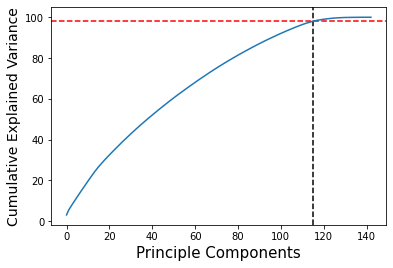

In [35]:
# Let's use the PCA technique

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_x = scaler.fit_transform(x)

x_pca = PCA()
x_pca.fit(df_x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)

print("Number of components explained 98% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

Out of 143, only 115 features is giving the 98% variance. So, let's use the pca technique for model building.

In [36]:
# PCA for model building

pca = PCA(n_components=115)
X = pca.fit_transform(df_x)
X

array([[-0.32971768, -2.13739542,  2.868656  , ..., -0.6995616 ,
        -0.01233113, -0.39892763],
       [ 4.1188308 ,  0.46626508,  3.47088032, ..., -0.34215175,
         0.80766228, -1.15039006],
       [ 1.25915981, -1.09228782,  0.13498855, ...,  1.06231622,
         0.44433567,  0.67050721],
       ...,
       [-1.97433745,  1.88374872, -0.32048687, ..., -1.13732511,
        -0.33356787, -0.71059863],
       [-3.42589989,  1.27359617, -0.66247217, ...,  0.43564616,
        -0.6337606 , -0.48514121],
       [-0.59246643,  2.77444956, -0.03027602, ...,  0.43488114,
         0.08993999, -0.21734016]])

In [37]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve
from time import time

In [52]:
# Let's find the best random state

def bestmodel(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,101):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state =i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = accuracy_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best Accuracy Score    : ",max_score)
    print("Cross Validation Score : ",cross_val_score(mod, X, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction {:.4f} seconds".format(end-start))

In [53]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
bestmodel(LR)

Best Random State      :  49
Best Accuracy Score    :  0.8885542168674698
Cross Validation Score :  0.8341400629249079
Time taken by model for prediction 2.0626 seconds


In [54]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Random State      :  49
Best Accuracy Score    :  0.822289156626506
Cross Validation Score :  0.757153858000924
Time taken by model for prediction 17.7621 seconds


In [55]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Random State      :  24
Best Accuracy Score    :  0.6626506024096386
Cross Validation Score :  0.6175573694748191
Time taken by model for prediction 4.3439 seconds


In [56]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
bestmodel(svc)

Best Random State      :  96
Best Accuracy Score    :  0.9006024096385542
Cross Validation Score :  0.8295659061406789
Time taken by model for prediction 22.9477 seconds


In [57]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
bestmodel(RFC)

Best Random State      :  96
Best Accuracy Score    :  0.8855421686746988
Cross Validation Score :  0.83156146179402
Time taken by model for prediction 122.5803 seconds


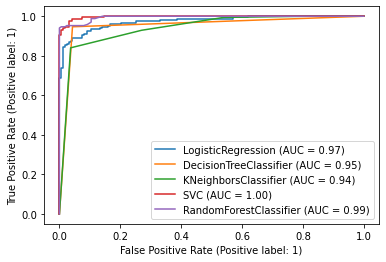

In [58]:
# Let's plot the ROC AUC Curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 96)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plt.legend(prop={"size":10}, loc="lower right")
plt.show()

#### After analyzing the accuracy score, cross validation score and ROC AUC curve. Now it is clear that Support Vector Classifier is giving the best score. So, let's try to increase the accuracy score using Hyperparameter Tuning.

In [66]:
# Final Model with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"kernel" : ["sigmoid", "rbf"], "gamma" : ["scale", "auto"],
             "cache_size" : [200,300], "random_state": [91,92,96,98,100]}

grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 96)
Final_Insurance_Model = SVC(kernel="rbf", gamma="auto", cache_size=200, random_state = 96)
Final_Insurance_Model.fit(x_train, y_train)
y_pred = Final_Insurance_Model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8975903614457831

In [68]:
# Saving The Final Model

import joblib

joblib.dump(Final_Insurance_Model,"Final_Insurance_Model.pkl")

['Final_Insurance_Model.pkl']